In [1]:
#Visualization
#Create ipynb file that has code for:
#1. importing matplotlib & seaborn
#2. importing lending club data (https://github.com/dosei1/Lending-Club-Loan-Data/blob/master/loans_2007.csv),
#3. prints a histogram for loan amount
#4. prints a bar chart with sum of loan amount per purpose
#5. prints a boxplot for loan amount, median + min + max + Q1+ Q3 + outliers and comment your findings
#6. print scatter plot for loans (y-axis for loans amount, x-axis for loan repayment term, color for purpose)



#1. importing matplotlib, seaborn, pandas and numpy

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#2. importing lending club data
df = pd.read_csv ('https://raw.githubusercontent.com/olhamk/Exploratory_Data_Science_with_Python/master/loans_2007.csv?raw')

In [3]:
df.head() #displaying the first 5 rows of dataset 

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


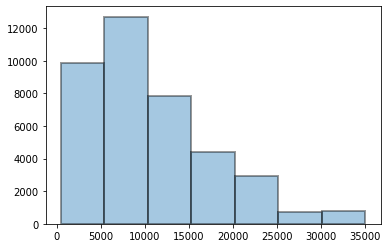

In [4]:
#3. histogram for loan amount
x = pd.DataFrame(df, columns = ['loan_amnt']) #defining the dataframe

#plotting a histogram with 7 bins (without the kernel density estimate)
sns.distplot(x, bins=7, kde=False, hist_kws=dict(edgecolor='black', linewidth=2)) 

#loan amounts in a range between 5k and 10k happen to be the most frequent

In [5]:
#iterating through all the columns that contain a word purpose

purpose_columns = [col for col in df.columns if 'purpose' in col] 

In [6]:
#creating a rule for the new column (where the purposes are equal to 1)

def new_column (row, my_columns): 
    for i, val in enumerate(my_columns):
        if row[val]==1:
            return val

In [7]:
#building a new column

df['purposes'] = df.apply(lambda row: new_column(row, purpose_columns), axis=1)

In [8]:
df.head() #checking the first 5 rows of dataset to make sure that the new column has been added

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,purposes
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,purpose_credit_card
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,purpose_car
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,purpose_small_business
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,purpose_other
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,purpose_wedding


In [9]:
#applying the groupby function to check the sum of loan amounts for each purpose 

Loans_df = df.groupby('purposes') ['loan_amnt'].sum() 

In [10]:
Loans_df

purposes
purpose_car                    10335425.0
purpose_credit_card            59139400.0
purpose_debt_consolidation    231670025.0
purpose_educational             2213400.0
purpose_home_improvement       33798450.0
purpose_house                   4789400.0
purpose_major_purchase         17824325.0
purpose_medical                 5705600.0
purpose_moving                  3847875.0
purpose_other                  31418650.0
purpose_renewable_energy         897875.0
purpose_small_business         24200475.0
purpose_vacation                2055900.0
purpose_wedding                 9259800.0
Name: loan_amnt, dtype: float64

[Text(0, 0, '0M'),
 Text(0, 0, '50M'),
 Text(0, 0, '100M'),
 Text(0, 0, '150M'),
 Text(0, 0, '200M'),
 Text(0, 0, '250M')]

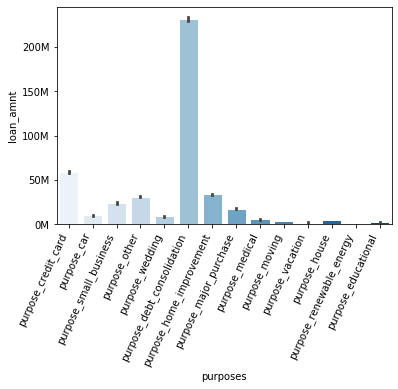

In [11]:
#4. bar chart with sum of loan amount per purpose

# defining the dataframe
Loans_per_purpose = pd.DataFrame(df, columns = ['purposes', 'loan_amnt'])
# plotting the barchart
b = sns.barplot(x = 'purposes', y = 'loan_amnt', data = Loans_per_purpose,
            palette = 'Blues', edgecolor = 'w', estimator=sum)
# rotating the xlabels 
plt.xticks(rotation=65, horizontalalignment='right')
# formatting the y labels so that the values could be displayed in millions
ylabels = ['{:,.0f}'.format(y) + 'M' for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)

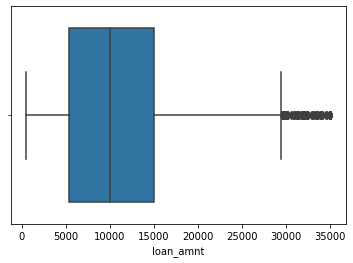

In [12]:
#6. boxplot for loan amount
sns.boxplot(x=df['loan_amnt'])

#min_amount = 0
#first quartile = 5000
#median = 10000
#third quartile = 15000
#max value = 30000
#some outliers can be found in a range between 30000 and 35000

In [13]:
#iterating through all the columns that contain a word term

term_columns = [col for col in df.columns if 'term' in col] 

In [14]:
#creating a rule for the new column (where the terms are equal to 1)
def new_column1 (row, my_columns):
    for i, val in enumerate(my_columns):
        if row[val]==1:
            return val

In [15]:
#building a new column
df['terms'] = df.apply(lambda row: new_column1(row, term_columns), axis=1)

In [16]:
#checking the first 5 rows of dataset to make sure that the new column has been added

df.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,purposes,terms
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,purpose_credit_card,term_ 36 months
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,purpose_car,term_ 60 months
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,purpose_small_business,term_ 36 months
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,purpose_other,term_ 36 months
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,purpose_wedding,term_ 36 months


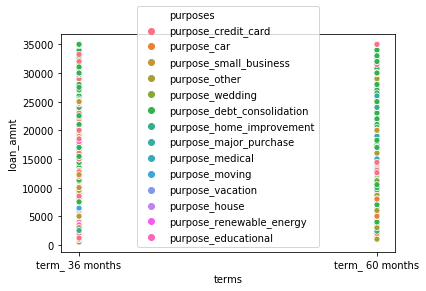

In [17]:
#6. scatter plot for loans

sns.scatterplot(x='terms', y='loan_amnt', hue='purposes', data=df)